In [1]:
import torch
import torch.nn as nn
import pandas as pd

In [15]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.count = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs=inputs)
        loss = self.loss_function(outputs, targets)

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        self.count += 1
        if self.count % 10 == 0:
            self.progress.append(loss.item())
            if self.count % 1000 == 0:
                print("... training loss: ", loss.item())
        
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))






In [3]:
from torch.utils.data import Dataset
from matplotlib import pyplot as plt

class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)

    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1

        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0

        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28,28)
        plt.title('label = ' + str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation='none', cmap='Blues')

    



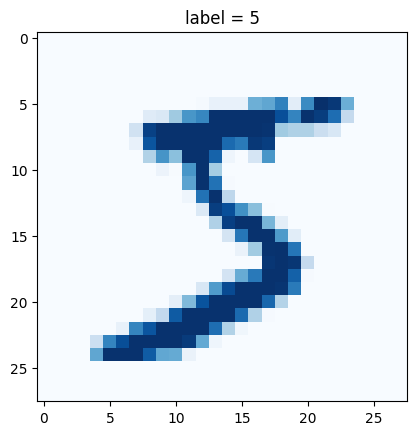

In [17]:
# 链接：https://pan.baidu.com/s/1V0WzUYvObLRU2wv8fYEwAg
# 提取码：z9bh

mnist_dataset = MnistDataset(csv_file='mnist_train_100.csv')
mnist_dataset = MnistDataset(csv_file='mnist_train.csv')

mnist_dataset.plot_image(0)

... training loss:  0.09100653976202011
... training loss:  0.08927910774946213
... training loss:  0.09146304428577423
... training loss:  0.08895352482795715
... training loss:  0.09160714596509933
... training loss:  0.08852019160985947
... training loss:  0.09006111323833466
... training loss:  0.09144914150238037
... training loss:  0.09101163595914841
... training loss:  0.08794572204351425
... training loss:  0.0884980633854866
... training loss:  0.08970418572425842
... training loss:  0.09054572880268097
... training loss:  0.09032896161079407
... training loss:  0.0882011353969574
... training loss:  0.07891907542943954
... training loss:  0.08933760225772858
... training loss:  0.08930890262126923
... training loss:  0.08881283551454544
... training loss:  0.0911346822977066
... training loss:  0.09003119170665741
... training loss:  0.08676393330097198
... training loss:  0.08619705587625504
... training loss:  0.08690832555294037
... training loss:  0.0891888290643692
... 

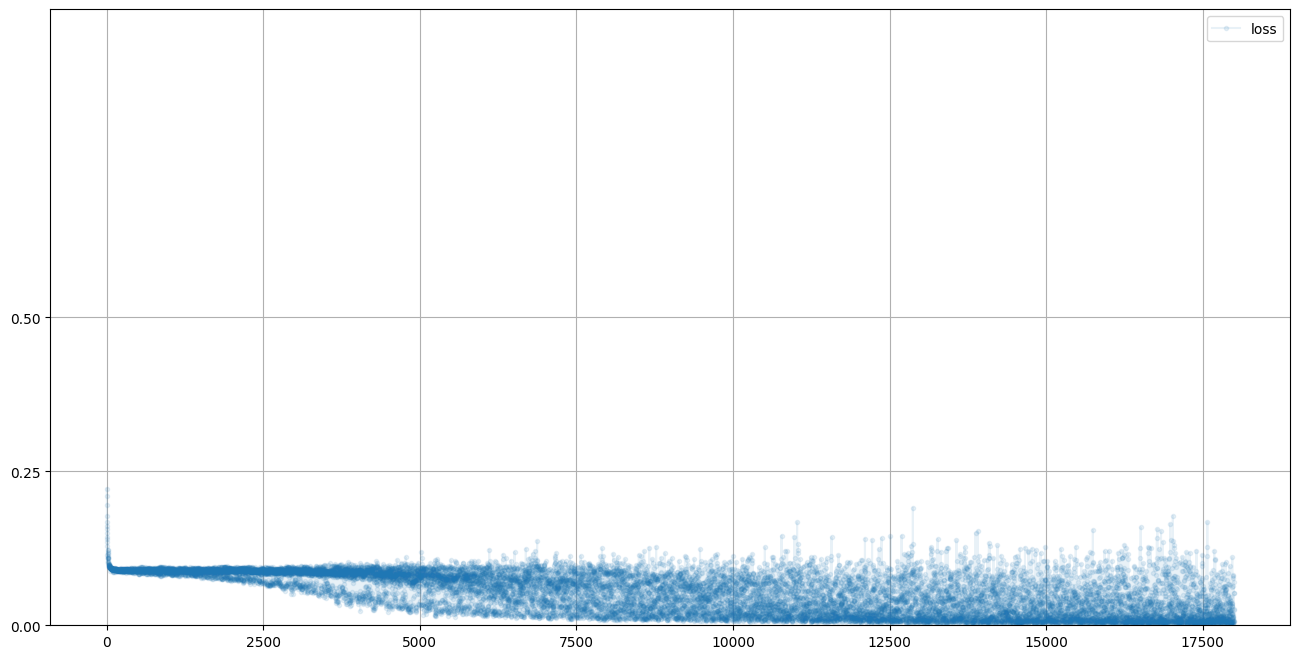

In [19]:
C = Classifier()

epochs = 3

for i in range(epochs):
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        
C.plot_progress()

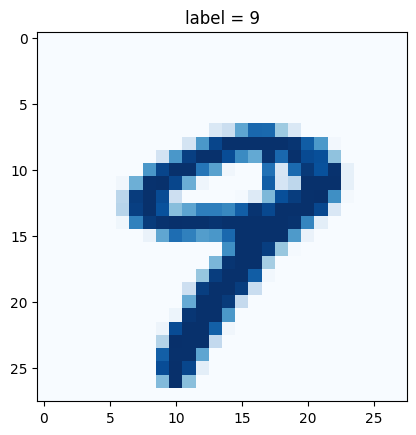

In [20]:
mnist_test_dataset = MnistDataset(csv_file='mnist_test_10.csv')

record = 9
mnist_test_dataset.plot_image(record)

<AxesSubplot:>

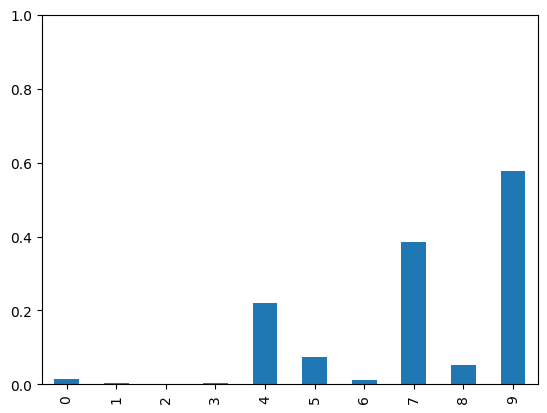

In [21]:
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pd.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))